# Week Class 2


## Get Data

In [4]:
!pip install google_play_scraper

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [5]:
from google_play_scraper import Sort, reviews_all
import pandas as pd

In [6]:
result = reviews_all(
        'com.myorbit',
        sleep_milliseconds=0, # defaults to 0
        lang='id', # defaults to 'en'
        country='id', # defaults to 'us'
        sort=Sort.NEWEST
    )

df = pd.DataFrame.from_records(result)
df = df[['at', 'content', 'score', 'userName']]

In [7]:
df['at'] = pd.to_datetime(df['at'])

# Filter rows based on the condition: Timestamp >= '2023-01-01'
filtered_df = df[df['at'] >= '2023-01-01']

In [8]:
filtered_df

at                                            content  \
0     2023-09-21 14:31:30  Sering muncul peringatan 'anda tidak terhubung...   
1     2023-09-28 00:14:40  Masih sering DC. Tiba2 g ada koneksi, lampu in...   
2     2023-09-24 13:44:07  Bapuk. Lemot. Padahal sudah di Taru dekat jend...   
3     2023-09-18 21:58:35  Sering muncul tulisan "tidak terhubung ke .......   
4     2023-10-02 21:40:00  Sudah beli model yg harganya sampai 2 jutaan. ...   
...                   ...                                                ...   
19497 2023-02-06 16:52:51                                               Good   
19502 2023-05-01 18:30:41                                            Semngat   
19516 2023-01-18 22:03:06                                               🙏🙏🙏🙏   
19517 2023-04-02 18:06:26                                               👍👍👍👍   
19523 2023-04-07 21:56:40                                        Bagus Bagus   

       score                   userName  
0          5                 Wilson Nts  
1          1              Saifullah fil  
2          1             allan afriyadi  
3          3  Suryokusumo Risdika Rizki  
4          3              Anton Karnadi  
...      ...                        ...  
19497      4            Prinstony Bella  
19502      4            Agus Adekaputra  
19516      5                  Meki Mote  
19517      5                Bertus Soen  
19523      5   Willyamsfrimaulana Willy  

[3022 rows x 4 columns]

## Text PreProcessing

In [9]:
!pip install nltk
!pip install sastrawi


Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


### Case Folding

In [10]:
kalimat = "Berikut ini adalah 5 negara dengan pendidikan terbaik di dunia adalah Korea Selatan, Jepang, Singapura, Hong Kong, dan Finlandia."
lower_case = kalimat.lower()
print(lower_case)


berikut ini adalah 5 negara dengan pendidikan terbaik di dunia adalah korea selatan, jepang, singapura, hong kong, dan finlandia.


In [11]:
import re # regular exoression modul
kalimat = "Berikut ini adalah 5 negara dengan pendidikan terbaik di dunia adalah Korea Selatan, Jepang, Singapura, Hong Kong, dan Finlandia."
hasil = re.sub(r"\d+",'', kalimat)
print(hasil)

Berikut ini adalah  negara dengan pendidikan terbaik di dunia adalah Korea Selatan, Jepang, Singapura, Hong Kong, dan Finlandia.


In [12]:
import string
kalimat = "Ini &adalah [contoh] kalimat? {dengan} tanda. baca?!!"
hasil = kalimat.translate(str.maketrans("","",string.punctuation))
print(hasil)


Ini adalah contoh kalimat dengan tanda baca


In [13]:
kalimat = " \t ini kalimat contoh\t "
hasil = kalimat.strip()
print(kalimat)
print(hasil)

 	 ini kalimat contoh	 
ini kalimat contoh


In [14]:
kalimat = "rumah idaman adalah rumah yang bersih."
pisah = kalimat.split()
print(pisah)

['rumah', 'idaman', 'adalah', 'rumah', 'yang', 'bersih.']


### Word Tokenize

In [15]:
import nltk
from nltk.tokenize import word_tokenize
#nltk.download('punkt')


kalimat = "rumah idaman adalah rumah yang bersih."
kalimat = kalimat.translate(str.maketrans('','',string.punctuation)).lower()
tokens = nltk.tokenize.word_tokenize(kalimat)
print(tokens)

['rumah', 'idaman', 'adalah', 'rumah', 'yang', 'bersih']


In [16]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."
kalimat = kalimat.translate(str.maketrans('','',string.punctuation)).lower()

tokens = nltk.tokenize.word_tokenize(kalimat)
kemunculan = nltk.FreqDist(tokens)
print(kemunculan.most_common())


[('andi', 2), ('online', 2), ('kerap', 1), ('melakukan', 1), ('transaksi', 1), ('rutin', 1), ('secara', 1), ('daring', 1), ('atau', 1), ('menurut', 1), ('belanja', 1), ('lebih', 1), ('praktis', 1), ('murah', 1)]


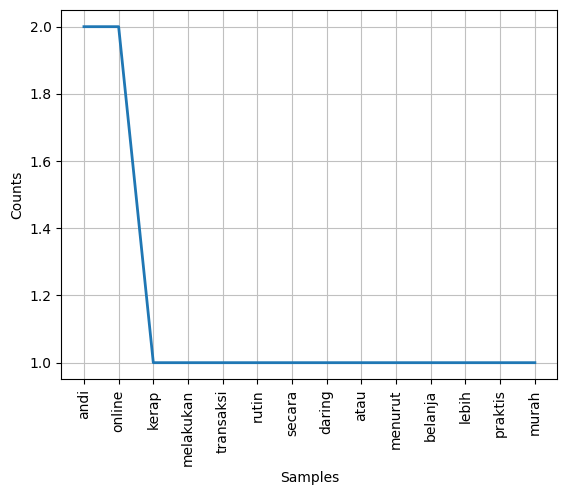

In [17]:
import matplotlib.pyplot as plt
kemunculan.plot(30,cumulative=False)
plt.show()

In [18]:
from nltk.tokenize import sent_tokenize
kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."

tokens = nltk.tokenize.sent_tokenize(kalimat)
print(tokens)

['Andi kerap melakukan transaksi rutin secara daring atau online.', 'Menurut Andi belanja online lebih praktis & murah.']


### Stopwords

In [19]:
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords

kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."
kalimat = kalimat.translate(str.maketrans('','',string.punctuation)).lower()

tokens = word_tokenize(kalimat)
listStopword =  set(stopwords.words('indonesian'))

removed = []
for t in tokens:
    if t not in listStopword:
        removed.append(t)

print(removed)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alharidt\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['andi', 'kerap', 'transaksi', 'rutin', 'daring', 'online', 'andi', 'belanja', 'online', 'praktis', 'murah']


In [20]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."
kalimat = kalimat.translate(str.maketrans('','',string.punctuation)).lower()
stop = stopword.remove(kalimat)
tokens = nltk.tokenize.word_tokenize(stop)
print(tokens)

['andi', 'kerap', 'melakukan', 'transaksi', 'rutin', 'daring', 'online', 'andi', 'belanja', 'online', 'lebih', 'praktis', 'murah']


In [21]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize
import string
import nltk

# Create a factory for the stopword remover
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

# Define your custom stopwords
custom_stopwords = ["andi"]

kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."

# Remove punctuation and convert to lowercase
kalimat = kalimat.translate(str.maketrans('', '', string.punctuation)).lower()

# Apply Sastrawi stopword removal
stop = stopword.remove(kalimat)

# Tokenize the text
tokens = nltk.tokenize.word_tokenize(stop)

# Remove custom stopwords
tokens = [x for x in tokens if x not in custom_stopwords]

print(tokens)

['kerap', 'melakukan', 'transaksi', 'rutin', 'daring', 'online', 'belanja', 'online', 'lebih', 'praktis', 'murah']


###Stemmer

In [22]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

kata = ["program", "programs", "programer", "programing", "programers"]

for k in kata:
    print(k, " : ", ps.stem(k))


program  :  program
programs  :  program
programer  :  program
programing  :  program
programers  :  program


In [23]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."
hasil = stemmer.stem(kalimat)
print(hasil)

andi kerap laku transaksi rutin cara daring atau online turut andi belanja online lebih praktis murah


In [24]:
filtered_df2 = filtered_df
filtered_df2

at                                            content  \
0     2023-09-21 14:31:30  Sering muncul peringatan 'anda tidak terhubung...   
1     2023-09-28 00:14:40  Masih sering DC. Tiba2 g ada koneksi, lampu in...   
2     2023-09-24 13:44:07  Bapuk. Lemot. Padahal sudah di Taru dekat jend...   
3     2023-09-18 21:58:35  Sering muncul tulisan "tidak terhubung ke .......   
4     2023-10-02 21:40:00  Sudah beli model yg harganya sampai 2 jutaan. ...   
...                   ...                                                ...   
19497 2023-02-06 16:52:51                                               Good   
19502 2023-05-01 18:30:41                                            Semngat   
19516 2023-01-18 22:03:06                                               🙏🙏🙏🙏   
19517 2023-04-02 18:06:26                                               👍👍👍👍   
19523 2023-04-07 21:56:40                                        Bagus Bagus   

       score                   userName  
0          5                 Wilson Nts  
1          1              Saifullah fil  
2          1             allan afriyadi  
3          3  Suryokusumo Risdika Rizki  
4          3              Anton Karnadi  
...      ...                        ...  
19497      4            Prinstony Bella  
19502      4            Agus Adekaputra  
19516      5                  Meki Mote  
19517      5                Bertus Soen  
19523      5   Willyamsfrimaulana Willy  

[3022 rows x 4 columns]

### Case with python with orbit data


In [25]:
import numpy as np
import pandas as pd
from gensim.utils import simple_preprocess

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


import re
import nltk

nltk.download('punkt')

from tqdm import tqdm
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize

stopword = StopWordRemoverFactory().create_stop_word_remover()
stemmer = StemmerFactory().create_stemmer()

def stemmerSastrawi(text):
    return stemmer.stem(text)

def stopwordSastrawi(text):
    return stopword.remove(text)

def regex(text):
    text = text.lower()
    text = re.sub(r'[^.,a-zA-Z0-9 \n\.]',' ',text) #remove symbol
    text = re.sub('[\s]+', ' ', text) #menghilangkan additional whitespace
    text = re.sub(r'[^\w\s]','',text) #remove punctuation
    text = text.strip() #menghilangkan enter, tab, dll
    return text

def ka_handling(text):
    tokens = text.split()
    for i,token in enumerate(tokens):
        if token in ka.keys():
            tokens[i] = ka[token]
    return ''.join(' '.join(x for x in tokens))

def addt_stop_word(sentence):
    words = word_tokenize(sentence)
    return ''.join(' '.join(w for w in words if not w.lower() in stop_words))

ka = pd.read_csv('kamus_alay.csv', encoding = "ISO-8859-1", header=None)
ka.columns = ['matab','mantap']
ka = {ka.matab[i]:ka.mantap[i] for i in range(0,len(ka.matab.values))}

stop_words = {'dan', 'di', 'ini',  'USER', 'User'}


def all_preproc(input_data):
    preproc = list(map(regex, input_data.values))
    preproc = list(map(ka_handling, preproc))
    preproc = list(map(stemmerSastrawi, tqdm(preproc)))
    preproc = list(map(stopwordSastrawi, tqdm(preproc)))
    preproc = list(map(addt_stop_word, tqdm(preproc)))
    return preproc

filtered_df2['contentp'] = filtered_df2['content'].astype(str).apply(lambda x: ' '.join(simple_preprocess(x)))
filtered_df2['contentp_clean'] = all_preproc(filtered_df2['contentp'])



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alharidt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Alharidt\AppData\Local\Temp\ipykernel_5160\2703571932.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['contentp'] = filtered_df2['content'].astype(str).apply(lambda x: ' '.join(simple_preprocess(x)))
100%|██████████| 3022/3022 [00:00<00:00, 3771.37it/s]
C:\Users\Alharidt\AppData\Local\Temp\ipykernel_5160\2703571932.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

C:\Users\Alharidt\AppData\Local\Temp\ipykernel_5160\2692269471.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['text_length'] = filtered_df2['contentp_clean'].apply(len)
C:\Users\Alharidt\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Alharidt\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


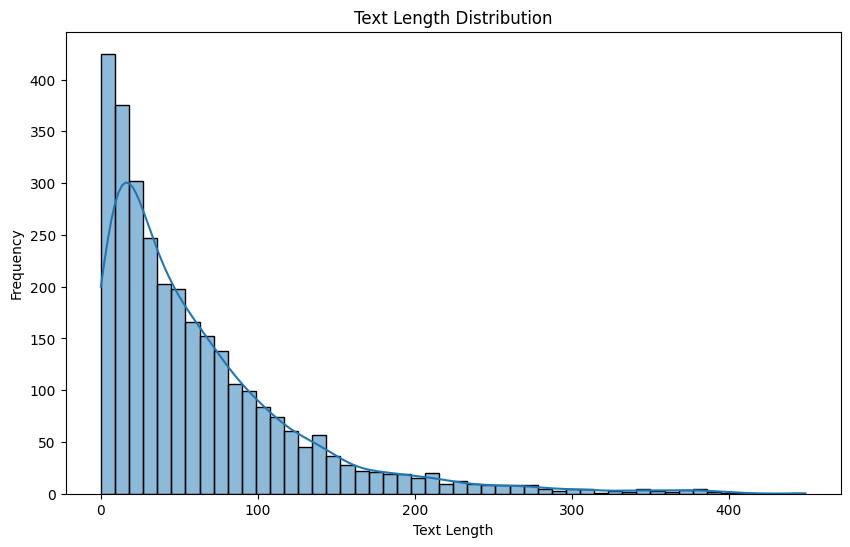

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

filtered_df2['text_length'] = filtered_df2['contentp_clean'].apply(len)

# Plot the distribution of text length
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df2, x='text_length', bins=50, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

C:\Users\Alharidt\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Alharidt\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Alharidt\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\Alharidt\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future ver

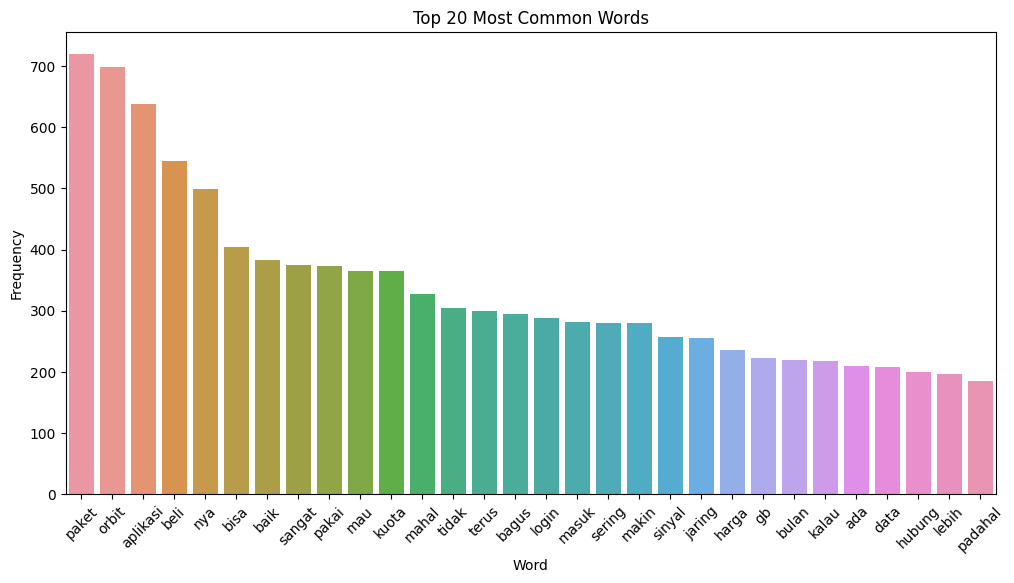

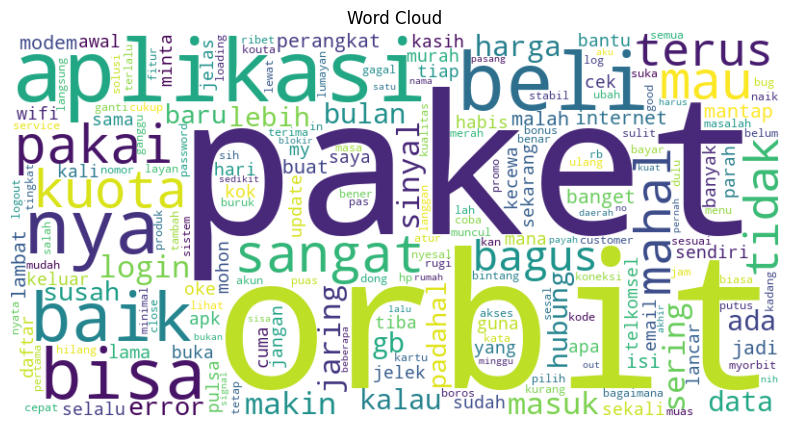

In [27]:
from nltk.tokenize import word_tokenize
from collections import Counter

# Tokenize and count word occurrences
word_counts = Counter(word_tokenize(' '.join(filtered_df2['contentp_clean'])))
most_common_words = word_counts.most_common(30)  # Get the top 20 most common words

# Plot a bar chart for the most common words
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words])
plt.title('Top 20 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In [28]:
filtered_df2

at                                            content  \
0     2023-09-21 14:31:30  Sering muncul peringatan 'anda tidak terhubung...   
1     2023-09-28 00:14:40  Masih sering DC. Tiba2 g ada koneksi, lampu in...   
2     2023-09-24 13:44:07  Bapuk. Lemot. Padahal sudah di Taru dekat jend...   
3     2023-09-18 21:58:35  Sering muncul tulisan "tidak terhubung ke .......   
4     2023-10-02 21:40:00  Sudah beli model yg harganya sampai 2 jutaan. ...   
...                   ...                                                ...   
19497 2023-02-06 16:52:51                                               Good   
19502 2023-05-01 18:30:41                                            Semngat   
19516 2023-01-18 22:03:06                                               🙏🙏🙏🙏   
19517 2023-04-02 18:06:26                                               👍👍👍👍   
19523 2023-04-07 21:56:40                                        Bagus Bagus   

       score                   userName  \
0          5                 Wilson Nts   
1          1              Saifullah fil   
2          1             allan afriyadi   
3          3  Suryokusumo Risdika Rizki   
4          3              Anton Karnadi   
...      ...                        ...   
19497      4            Prinstony Bella   
19502      4            Agus Adekaputra   
19516      5                  Meki Mote   
19517      5                Bertus Soen   
19523      5   Willyamsfrimaulana Willy   

                                                contentp  \
0      sering muncul peringatan anda tidak terhubung ...   
1      masih sering dc tiba ada koneksi lampu indokat...   
2      bapuk lemot padahal sudah di taru dekat jendel...   
3      sering muncul tulisan tidak terhubung ke nama ...   
4      sudah beli model yg harganya sampai jutaan awa...   
...                                                  ...   
19497                                               good   
19502                                            semngat   
19516                                                      
19517                                                      
19523                                        bagus bagus   

                                          contentp_clean  text_length  
0      sering muncul ingat tidak hubung jaring orbit ...          238  
1      sering dc tiba koneksi lampu indokator merah e...          226  
2      jelek lambat padahal taru dekat jendela lantai...          269  
3      sering muncul tulis hubung nama wifi padahal j...          240  
4      beli model harga juta awal kencang tahun pakai...          147  
...                                                  ...          ...  
19497                                               good            4  
19502                                            semngat            7  
19516                                                               0  
19517                                                               0  
19523                                        bagus bagus           11  

[3022 rows x 7 columns]

In [29]:
filtered_df2.to_csv('clean_review_all.csv', index=False)